In [1]:
%pwd

'C:\\Users\\Carlo\\EE258_Project'

import os
for filenames in os.listdir('dataset/'):
        print(os.path.join("dataset/", filenames))

In [2]:
import numpy as np 
import pandas as pd

import os

import random

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

import matplotlib.pyplot as plt

# Dataset Path

In [3]:
train_dir = os.path.join("dataset/Rock-Paper-Scissors/train/")
print("Train datapath contains: ", os.listdir(train_dir))


val_dir = os.path.join("dataset/Rock-Paper-Scissors/validation/")
print("Validation datapath contains: ", os.listdir(val_dir))

test_dir = os.path.join("dataset/Rock-Paper-Scissors/test/")
print("Test datapath contains: ", os.listdir(test_dir))

custom_test_dir = os.path.join("dataset/Rock-Paper-Scissors/custom_test_3/")
print("Test datapath contains: ", os.listdir(custom_test_dir))


Train datapath contains:  ['paper', 'rock', 'scissors']
Validation datapath contains:  ['paper', 'rock', 'scissors']
Test datapath contains:  ['paper-hires1.png', 'paper-hires2.png', 'paper1.png', 'paper2.png', 'paper3.png', 'paper4.png', 'paper5.png', 'paper6.png', 'paper7.png', 'paper8.png', 'paper9.png', 'rock-hires1.png', 'rock-hires2.png', 'rock1.png', 'rock2.png', 'rock3.png', 'rock4.png', 'rock5.png', 'rock6.png', 'rock7.png', 'rock8.png', 'rock9.png', 'scissors-hires1.png', 'scissors-hires2.png', 'scissors1.png', 'scissors2.png', 'scissors3.png', 'scissors4.png', 'scissors5.png', 'scissors6.png', 'scissors7.png', 'scissors8.png', 'scissors9.png']
Test datapath contains:  ['paper (1).JPG', 'paper (2).JPG', 'paper (3).JPG', 'paper (4).JPG', 'paper (5).JPG', 'paper (6).JPG', 'rock (1).JPG', 'rock (2).JPG', 'rock (3).JPG', 'rock (4).JPG', 'rock (5).JPG', 'rock (6).JPG', 'scissors (1).JPG', 'scissors (2).JPG', 'scissors (3).JPG', 'scissors (4).JPG', 'scissors (5).JPG', 'scissors (6)

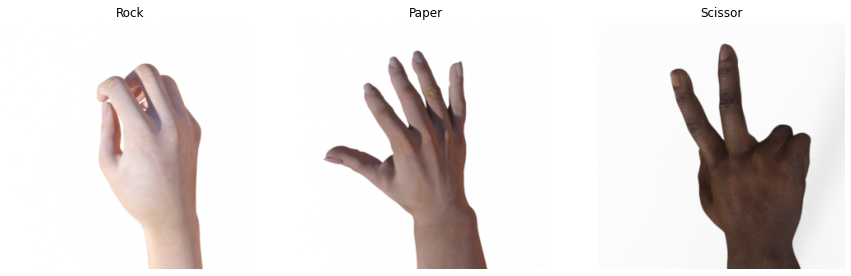

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

sample_rock = random.choice(os.listdir(train_dir + "rock"))
image = load_img(train_dir + "rock/" + sample_rock)
ax[0].imshow(image)
ax[0].set_title("Rock")
ax[0].axis("Off")

sample_paper = random.choice(os.listdir(train_dir + "paper"))
image = load_img(train_dir + "paper/" + sample_paper)
ax[1].imshow(image)
ax[1].set_title("Paper")
ax[1].axis("Off")

sample_scissor = random.choice(os.listdir(train_dir + "scissors"))
image = load_img(train_dir + "scissors/" + sample_scissor)
ax[2].imshow(image)
ax[2].set_title("Scissor")
ax[2].axis("Off")

plt.show()

# Training Data Sample

# Modeling the NN

In [5]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [7]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Callback

In [8]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.85):
            print("\nReached >95% accuracy so cancelling training!")
            self.model.stop_training = True
        
callbacks = myCallback()

Training Generator

In [9]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=50,
      width_shift_range=0.3, # Shifting image width by 20%
      height_shift_range=0.3,# Shifting image height by 20%
      shear_range=0.2,       # Rotation across X-axis by 20%
      zoom_range=0.2,        # Image zooming by 20%
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20
)

Found 2520 images belonging to 3 classes.


Validation Generator

In [10]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20
)

Found 372 images belonging to 3 classes.


In [11]:
import time
start_time = time.time()
history = model.fit(
      train_generator,
      steps_per_epoch = np.ceil(2520/20),  # 2520 images = batch_size * steps
      epochs = 10,
      validation_data=validation_generator,
      validation_steps = np.ceil(372/20),  # 372 images = batch_size * steps
      callbacks=[callbacks],
      verbose = 1)
end_time = time.time()

Epoch 1/10
126/126 [==============================] - 30s 231ms/step - loss: 1.1091 - accuracy: 0.3488 - val_loss: 1.0702 - val_accuracy: 0.3790
Epoch 2/10
126/126 [==============================] - 28s 224ms/step - loss: 0.9850 - accuracy: 0.4857 - val_loss: 0.5007 - val_accuracy: 0.7984
Epoch 3/10
126/126 [==============================] - 28s 225ms/step - loss: 0.6371 - accuracy: 0.7282 - val_loss: 0.3161 - val_accuracy: 0.9113
Epoch 4/10
126/126 [==============================] - 28s 224ms/step - loss: 0.4320 - accuracy: 0.8298 - val_loss: 0.2403 - val_accuracy: 0.9086
Epoch 5/10
126/126 [==============================] - ETA: 0s - loss: 0.3021 - accuracy: 0.8877
Reached >95% accuracy so cancelling training!
126/126 [==============================] - 28s 225ms/step - loss: 0.3021 - accuracy: 0.8877 - val_loss: 0.2559 - val_accuracy: 0.9086


In [12]:
print("Training time: ",end_time-start_time)

Training time:  143.33678579330444


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(7,7))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(7,7))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Testing with similar training data

In [13]:
test_img = os.listdir(os.path.join(test_dir))

test_df = pd.DataFrame({'Image': test_img})
test_df['True Label'] = test_df['Image']
for ind in test_df.index: 
    if('paper' in test_df['Image'][ind]):
        test_df['True Label'][ind] = 'paper'
    if('rock' in test_df['Image'][ind]):
        test_df['True Label'][ind] = 'rock'   
    if('scissors' in test_df['Image'][ind]):
        test_df['True Label'][ind] = 'scissors'    


test_df

,Image,True Label
0,paper-hires1.png,paper
1,paper-hires2.png,paper
2,paper1.png,paper
3,paper2.png,paper
4,paper3.png,paper
5,paper4.png,paper
6,paper5.png,paper
7,paper6.png,paper
8,paper7.png,paper
9,paper8.png,paper


In [14]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    test_dir, 
    x_col = 'Image',
    y_col = None,
    class_mode = None,
    target_size = (150, 150),
    batch_size = 20,
    shuffle = False
)

Found 33 validated image filenames.


In [15]:
predict = model.predict(test_generator, steps = int(np.ceil(33/20)))

In [16]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
label_map

{0: 'paper', 1: 'rock', 2: 'scissors'}

In [17]:
test_df['Label'] = np.argmax(predict, axis = -1) # axis = -1 --> To compute the max element index within list of lists

test_df['Label'] = test_df['Label'].replace(label_map)

test_df



,Image,True Label,Label
0,paper-hires1.png,paper,paper
1,paper-hires2.png,paper,paper
2,paper1.png,paper,paper
3,paper2.png,paper,paper
4,paper3.png,paper,paper
5,paper4.png,paper,paper
6,paper5.png,paper,paper
7,paper6.png,paper,paper
8,paper7.png,paper,paper
9,paper8.png,paper,paper


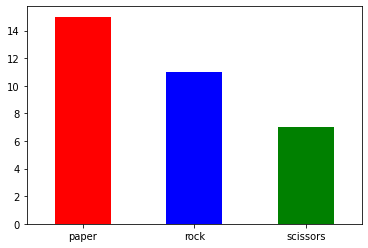

In [18]:
test_df.Label.value_counts()
test_df.Label.value_counts().plot.bar(color = ['red','blue','green'])
plt.xticks(rotation = 0)
plt.show()

# Test Dataset with similar training data

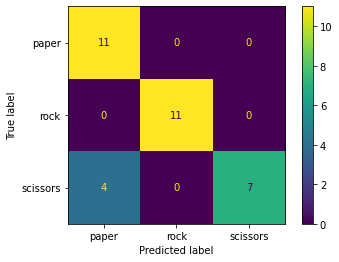

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(test_df['True Label'].to_numpy(), test_df['Label'].to_numpy())

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['paper','rock','scissors'])
disp_test.plot()

In [21]:
from sklearn.metrics import classification_report
y_true = test_df['True Label'].to_numpy()
y_pred = test_df['Label'].to_numpy()
print(classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

       paper      0.733     1.000     0.846        11
        rock      1.000     1.000     1.000        11
    scissors      1.000     0.636     0.778        11

    accuracy                          0.879        33
   macro avg      0.911     0.879     0.875        33
weighted avg      0.911     0.879     0.875        33



In [20]:
lis = []
for ind in test_df.index: 
    if(test_df['Label'][ind] in test_df['Image'][ind]):
        lis.append(1)
    else:
        lis.append(0)
        
print("Accuracy of the model on custom test data is {:.3f}".format((sum(lis)/len(lis))*100))        

Accuracy of the model on custom test data is 87.879


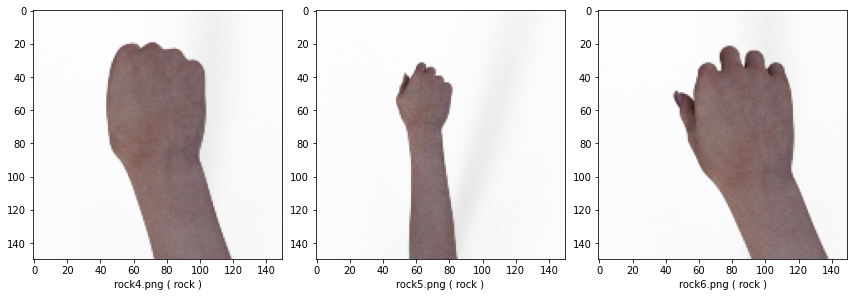

In [22]:
v = random.randint(0, 25)

sample_test = test_df.iloc[v:(v+3)].reset_index(drop = True)
sample_test.head()

plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['Image']
    category = row['Label']
    img = load_img(test_dir + filename, target_size = (150, 150))
    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(filename + ' ( ' + "{}".format(category) + ' )' )
plt.tight_layout()
plt.show()

# Test Data (A) Sample

# Custom Test dataset

In [34]:
custom_img = os.listdir(os.path.join(custom_test_dir))

custom_test_df = pd.DataFrame({'Image': custom_img})

custom_test_df['True Label'] = custom_test_df['Image']
for ind in custom_test_df.index: 
    if('paper' in custom_test_df['Image'][ind]):
        custom_test_df['True Label'][ind] = 'paper'
    if('rock' in custom_test_df['Image'][ind]):
        custom_test_df['True Label'][ind] = 'rock'   
    if('scissors' in custom_test_df['Image'][ind]):
        custom_test_df['True Label'][ind] = 'scissors'  
custom_test_df

,Image,True Label
0,paper (1).JPG,paper
1,paper (10).JPG,paper
2,paper (11).JPG,paper
3,paper (12).JPG,paper
4,paper (2).JPG,paper
5,paper (3).JPG,paper
6,paper (4).JPG,paper
7,paper (5).JPG,paper
8,paper (6).JPG,paper
9,paper (7).JPG,paper


In [35]:
custom_test_dir

'dataset/Rock-Paper-Scissors/custom_test_3/'

In [36]:
custom_test_gen = ImageDataGenerator(rescale=1./255)

custom_test_generator = test_gen.flow_from_dataframe(
    custom_test_df, 
    custom_test_dir, 
    x_col = 'Image',
    y_col = None,
    class_mode = None,
    target_size = (150, 150),
    batch_size = 18,
    shuffle = False,
    interpolation='bilinear'
)

Found 34 validated image filenames.


In [37]:
predict = model.predict(custom_test_generator, steps = 18)

In [38]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
label_map

{0: 'paper', 1: 'rock', 2: 'scissors'}

In [39]:
custom_test_df['Label'] = np.argmax(predict, axis = -1) # axis = -1 --> To compute the max element index within list of lists

custom_test_df['Label'] = custom_test_df['Label'].replace(label_map)

In [40]:
custom_test_df

,Image,True Label,Label
0,paper (1).JPG,paper,paper
1,paper (10).JPG,paper,paper
2,paper (11).JPG,paper,paper
3,paper (12).JPG,paper,paper
4,paper (2).JPG,paper,rock
5,paper (3).JPG,paper,rock
6,paper (4).JPG,paper,paper
7,paper (5).JPG,paper,paper
8,paper (6).JPG,paper,paper
9,paper (7).JPG,paper,rock


# Test Dataset using Custom New Data

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(custom_test_df['True Label'], custom_test_df['Label'])

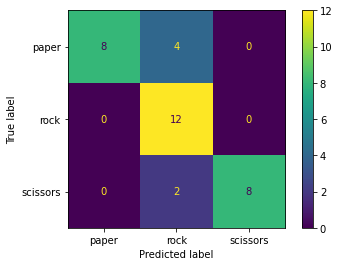

In [41]:
cm = confusion_matrix(custom_test_df['True Label'], custom_test_df['Label'].to_numpy())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['paper','rock','scissors'])
disp.plot()

In [31]:
y_true = custom_test_df['True Label']
y_pred = custom_test_df['Label']
cm 
print(classification_report(y_true, y_pred, digits=4))

              precision    recall  f1-score   support

       paper     1.0000    0.6667    0.8000         6
        rock     0.7500    1.0000    0.8571         6
    scissors     1.0000    1.0000    1.0000         6

    accuracy                         0.8889        18
   macro avg     0.9167    0.8889    0.8857        18
weighted avg     0.9167    0.8889    0.8857        18



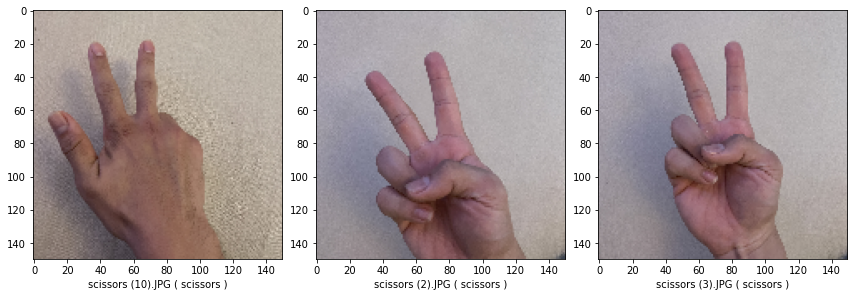

In [44]:
v = random.randint(0, 25)
#

sample_test = custom_test_df.iloc[v:(v+3)].reset_index(drop = True)
sample_test.head()

plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['Image']
    category = row['Label']
    img = load_img(custom_test_dir + filename, target_size = (150, 150))
    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(filename + ' ( ' + "{}".format(category) + ' )' )
plt.tight_layout()
plt.show()

# Test Data (B) Sample

Accuracy

In [33]:
lis = []
for ind in custom_test_df.index: 
    if(custom_test_df['Label'][ind] in custom_test_df['Image'][ind]):
        lis.append(1)
    else:
        lis.append(0)
        
print("Accuracy of the model on custom test data is {:.3f}".format((sum(lis)/len(lis))*100))        

Accuracy of the model on custom test data is 88.889
